# Use of Ensemble Modelling to Reduce Fatalities in Aviation Industry



<img src='https://drive.google.com/uc?id=1F30qfmSiyUL-6GfNY2cUFYGhzXVS962x'>

# **A. INTRODUCTION**

The data used in this project comes from [a Kaggle competition](https://www.kaggle.com/c/reducing-commercial-aviation-fatalities), which attempts to reduce the fatalities in aviation industry by using      
**aircrew’s physiological data who may be distracted, sleepy or in other dangerous cognitive states.**



Our challenge is to build a model to detect troubling events from aircrew’s physiological data. We'll use data acquired from actual pilots in test situations, and Our models should be able to run calculations in real time to monitor the cognitive states of pilots. **With this model's help, pilots could then be alerted when they enter a troubling state, preventing accidents and saving lives.**

# **B. DESCRIPTION OF THE DATA**

> ### All Data:
This Data consists of  physiological data from eighteen pilots who were subjected to various distracting events.

The training set consist of 6 minutes set of controlled experiment collected in a non-flight environment. When members are subjected to these experiments, The sensors which are attached in different parts of their body transmits the real time data with us, Based on which we predict the behavioral condition of the member at that point of time under different experiences.  

Here 4 sensors are used to prepare traing data--

1. Electrocardiogram
2. Respiration
3. Galvanic Skin Response
4. Electroencephalogram


> ### Electrocardiogram:

•	3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts.


> ### Respiration:

•	A measure of the rise and fall of the chest. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.

> ### Galvanic Skin Response:

•	A measure of electrodermal activity. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.
"The galvanic skin response (GSR, which falls under the umbrella term of electrodermal activity, or EDA) refers to changes in sweat gland activity that are reflective of the intensity of our emotional state, otherwise known as emotional arousal."

> ### Electroencephalogram :

•3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts.


### Following four set of cognitive states of the member in experiments:

**Channelized Attention (CA)** --the state of being focused on one task to the exclusion of all others. 

**Diverted Attention (DA)**-- is the state of having one’s attention diverted by actions or thought processes associated with a decision.

**Startle/Surprise (SS)**-- is induced by having the subjects watch movie clips with jump scares.

**Baseline** --- Normal state




> ### Training Data:
- 4.9 million samples in the training set (1.5Gb in size)
- Experiments performed for each cognitive state to each individual    members are performed.
- Each experiment either gives cognitive state corresponding to that experiment or the Baseline as its state. 

> ### Test Data:
- 19 Million samples in the test set (4.5 Gb in size)
- Testing is done in simulated training vehicles. 
- Prediction of Cognbitive states based on that data is required. 



# **C. Evaluation**

Submissions are to done in CSV format. For each id in the test set, we have to predict a probability for each of the 4 possible cognitive states ( A = baseline / no event, B = SS, C = CA, D = DA). 

Evaluation is done by **Multi Class Log Loss** between the predicted probabilities and the observed target.

# **D. ATTRIBUTES OF THIS PROJECT**

This competition makes for a particulary interesting Machine Learning project as it:

1. Has a huge dataset memory size (approx 6Gb), Handling of which is itself a challenging task  
2. Involves raw sensor (signal) data
3. Involves processing time series data
4. Requires feature engineering
5. Is a multiclass classification problem
6. All Ensemble models can be tested and applied for better results. 

The techniques necessary to work with this data are applicable to many other types of Machine Learning problems.

# **1. IMPORT AND PROCESS DATA**

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-rishabh95/use-of-ensemble-modelling-to-reduce-fatalities-in-aviation-industry


'https://jovian.ai/dwivedi-rishabh95/use-of-ensemble-modelling-to-reduce-fatalities-in-aviation-industry'

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn scikit-learn opendatasets --quiet

## a. Download Data
- Requires a Kaggle account username and API key to use opendatasets

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/c/reducing-commercial-aviation-fatalities' ## Commercial Aviation Fatalities Data

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishabhdwivedi123
Your Kaggle Key: ··········


100%|██████████| 2.13G/2.13G [00:27<00:00, 83.4MB/s]



Extracting archive ./reducing-commercial-aviation-fatalities/reducing-commercial-aviation-fatalities.zip to ./reducing-commercial-aviation-fatalities


In [ ]:
data_dir = 'reducing-commercial-aviation-fatalities'
!ls -lh {data_dir}

total 5.9G
-rw-r--r-- 1 root root 281M Feb  2 19:47 sample_submission.csv
-rw-r--r-- 1 root root 4.5G Feb  2 19:49 test.csv
-rw-r--r-- 1 root root 1.2G Feb  2 19:49 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

4867422 reducing-commercial-aviation-fatalities/train.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv


17965144 reducing-commercial-aviation-fatalities/sample_submission.csv


## b. Install Libraries

In [ ]:
## Import Useful Libraries

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set_style("darkgrid")

from tqdm import tqdm_notebook as tqdm

## c. Create DataFrames from CSVs

In [ ]:
# ** These dtypes are used to lower the memory usage so that we can process data
# in an easy way **

dtypes = {"crew": "int8",
          "experiment": "category",
          "time": "float32",
          "seat": "int8",
          "eeg_fp1": "float32",
          "eeg_f7": "float32",
          "eeg_f8": "float32",
          "eeg_t4": "float32",
          "eeg_t6": "float32",
          "eeg_t5": "float32",
          "eeg_t3": "float32",
          "eeg_fp2": "float32",
          "eeg_o1": "float32",
          "eeg_p3": "float32",
          "eeg_pz": "float32",
          "eeg_f3": "float32",
          "eeg_fz": "float32",
          "eeg_f4": "float32",
          "eeg_c4": "float32",
          "eeg_p4": "float32",
          "eeg_poz": "float32",
          "eeg_c3": "float32",
          "eeg_cz": "float32",
          "eeg_o2": "float32",
          "ecg": "float32",
          "r": "float32",
          "gsr": "float32",
          "event": "category",
         }

In [ ]:
train_df = pd.read_csv('/content/reducing-commercial-aviation-fatalities/train.csv', dtype=dtypes)

In [ ]:
test_df = pd.read_csv('/content/reducing-commercial-aviation-fatalities/test.csv', dtype=dtypes)

In [ ]:
print(train_df.memory_usage().sum() / 1024**2)

464.1938819885254


In [ ]:
train_df.head(10)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,23.712299,-6.695870,29.232100,24.842899,3.921340,18.447001,1.07547,3.09029,37.368999,17.437599,19.201900,20.596800,-3.951150,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,21.010300,-6.474720,26.641399,24.138800,5.469910,20.510599,2.83354,7.10177,31.170799,19.399700,19.689501,21.354700,1.332120,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,25.431801,-0.088707,28.119900,26.891300,8.578860,23.162901,4.51993,12.70550,-12.012600,19.396299,23.171700,22.407600,1.537860,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,19.142799,-0.256516,30.653601,24.247000,8.643100,19.961901,7.27575,11.45980,18.574100,23.156401,22.641199,19.336700,2.544920,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,20.572100,-1.953470,31.722601,25.155500,12.500300,18.746901,7.30976,8.00805,6.555440,22.754700,22.670300,20.293200,1.699620,22.812799,-4520.0,817.705994,388.829987,A
5,1,CA,0.031250,1,6.06746,23.128300,8.645660,14.380800,16.055500,26.925200,20.889999,-4.354870,33.799099,22.632099,14.980700,15.017100,7.16106,6.41567,-9.289120,21.440599,23.253700,19.069599,-0.765018,26.451900,-4520.0,817.705994,388.829987,A
6,1,CA,0.035156,1,-1.37602,20.972000,3.754160,13.766700,18.122000,29.391199,21.762899,-6.691670,34.047100,23.177799,15.512600,14.257000,7.69083,3.22675,-0.604736,20.993401,21.556200,17.327299,1.465000,21.289301,-4520.0,817.705994,388.829987,A
7,1,CA,0.039062,1,1.54787,18.398100,-9.113150,-1.033160,22.627001,32.816601,19.596001,-4.504030,33.922699,26.174601,15.871200,12.616600,10.46720,2.59115,17.483601,22.912600,23.187000,18.462700,0.299232,23.691500,-4520.0,817.705994,388.829987,A
8,1,CA,0.042969,1,-7.78946,12.210700,-8.953760,1.091740,28.526501,35.267200,21.544500,-14.645400,36.587299,29.164301,18.209801,10.286900,11.10940,2.73550,16.681101,28.779600,28.382099,20.697300,-6.620750,31.672701,-4520.0,817.705994,388.829987,A
9,1,CA,0.046875,1,-11.17750,18.235901,-1.035220,4.751110,25.983801,30.499100,25.761000,-8.347080,31.597300,25.024300,18.157301,11.558000,9.81652,1.57767,0.489098,21.937500,21.629299,19.525999,-5.186040,21.618700,-4520.0,817.705994,388.829987,A


In [ ]:
df_train=train_df.copy()

# **2. EXPLORATORY DATA ANALYSIS**

## How Data is divided in to different sets of target events and experiments??

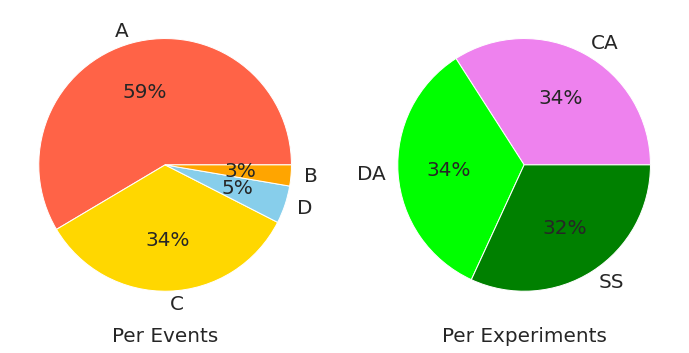

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

df_train.groupby('event').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue','orange'], ax=ax1)
df_train.groupby('experiment').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 20},
                                 colors=['violet', 'lime','green'], ax=ax2)
ax1.set_xlabel('Per Events', size=20)
ax1.set_ylabel('')
ax2.set_xlabel('Per Experiments', size=20)
ax2.set_ylabel('')
plt.tight_layout()
plt.show()

## How counts of target event changes based on the seat in which pilot sits?? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


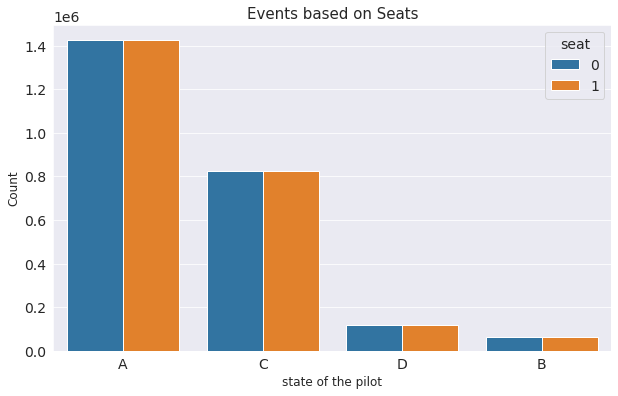

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('event', hue='seat', data=df_train)
plt.xlabel("state of the pilot", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Events based on Seats", fontsize=15)
plt.show()

## Are all the crew members subjected to every target event or not ??

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


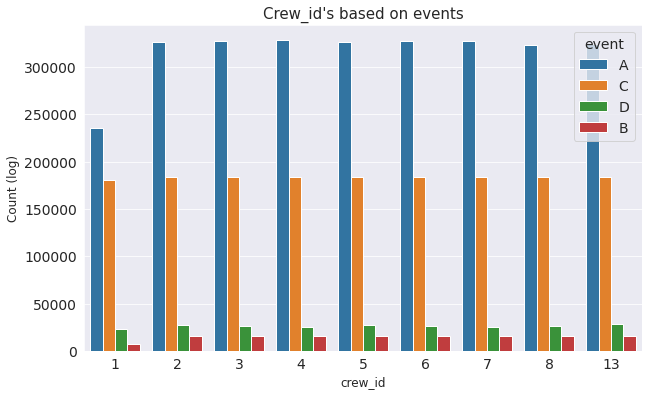

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('crew', hue='event', data=df_train)
plt.xlabel("crew_id", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.title("Crew_id's based on events", fontsize=15)
plt.show()

## Are there any Null values?

In [ ]:
df_train.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

## Minimas and Maximas of all the features ? 

In [ ]:
df_train.describe().loc[['min', 'max']]

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
min,1.0,0.003000,0.0,-1361.359985,-1581.329956,-1643.949951,-1516.640015,-1220.510010,-1266.430054,-1279.939941,-1393.479980,-2887.909912,-1226.780029,-2875.939941,-1353.410034,-4064.070068,-2333.830078,-1212.030029,-1228.030029,-1229.130005,-1230.479980,-696.278992,-1176.369995,-18585.699219,482.059998,0.000000
max,13.0,360.371094,1.0,1972.239990,2048.790039,2145.709961,1731.880005,900.937012,1176.540039,1514.819946,2103.300049,1879.329956,931.627014,2162.229980,1381.369995,3893.330078,2034.170044,891.729004,908.088989,1435.800049,928.406982,613.669006,2443.550049,34188.300781,840.184021,1999.859985


## Distribution of Data using Box-plot

In [ ]:
cols= list(df_train.columns)
unwanted_features=['crew','seat','experiment','time','event']
features = [ele for ele in cols if ele not in unwanted_features]

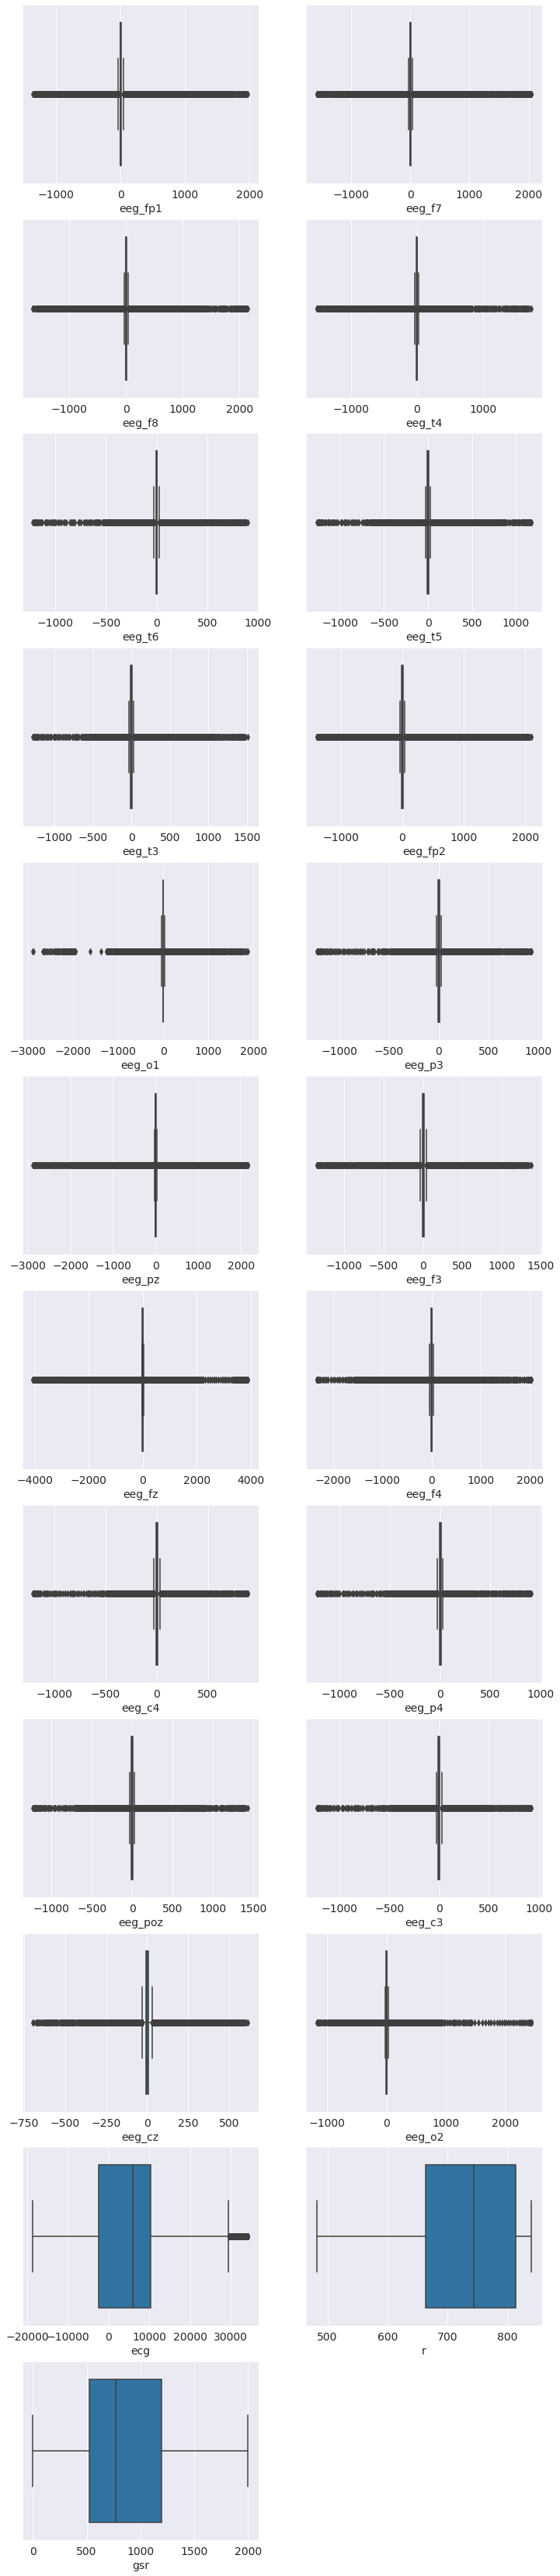

In [ ]:
fig=plt.figure(figsize=(12,60))

for i,poll  in enumerate(features):
    fig.add_subplot(12,2,i+1)
    sns.boxplot(x=poll,data=df_train)

## Remove Outliers

We can remove the outliers as shown in the above box-plot but we did not do it so as test data may also have such outliers, which if not taken into consideration here, can give us wrong predictions.

To remove all the Outliers Uncomment the code given below and run.


In [ ]:
# def remove_outlier(train_df,features):
#     q1=np.percentile(train_df[features],25)

#     q3=np.percentile(train_df[features],75)

#     iqr = q3 - q1

#     upper_bound = q3 + (1.5 * iqr) 
#     lower_bound = q1 - (1.5 * iqr)

#     upper_value = np.percentile(train_df[features],95)
#     lower_value = np.percentile(train_df[features],5)

#     train_df.loc[train_df[features] >= upper_bound, features] = upper_value 
#     train_df.loc[train_df[features] <= lower_bound, features] = lower_value
   
#     return train_df


# for i in features:
#     df1=remove_outlier(train_df,i)

# fig=plt.figure(figsize=(12,60))

# for i,poll  in enumerate(features):
#     fig.add_subplot(12,2,i+1)
#     sns.boxplot(x=poll,data=df1)

## Relation between the time at which most of the events are happening

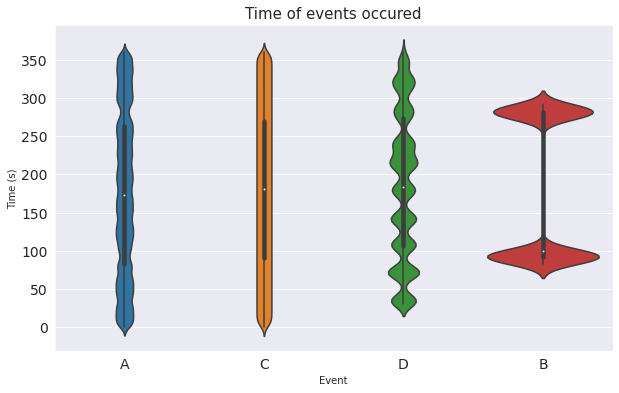

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='event', y='time', data=df_train)
plt.ylabel("Time (s)", fontsize=10)
plt.xlabel("Event", fontsize=10)
plt.title("Time of events occured", fontsize=15)
plt.show()

## Correlation between all the features in our data.


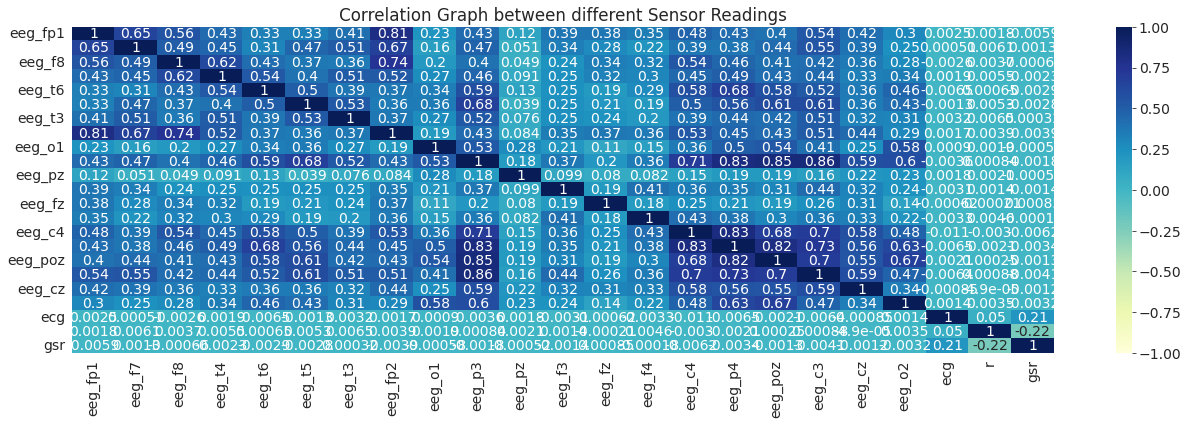

In [ ]:
corr_matrix = df_train.iloc[:,4:29].corr()

fig = plt.figure(figsize = (22, 6))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,annot=True,fmt='.2g',cmap="YlGnBu",)
plt.title('Correlation Graph between different Sensor Readings')
plt.show()

## Visualize Data based on individual crew member---

In [ ]:
def filt_data(crew,experiment,seat):

  return df_train[(df_train.crew == crew) & (df_train.seat == seat) & (df_train.experiment == experiment)].sort_values(by=['time'])

def timely_data(data,in_time,secs):

  return data[(data.time>=in_time)&(data.time<=(in_time+secs))].sort_values(by=['time'])

crew_13CA0=== 13th crew member performed with CA experiment and sitting on seat 0 

In [ ]:
crew_13CA0=filt_data(13,'CA',0)

crew_13CA0.head(5)

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,eeg_p3,eeg_pz,eeg_f3,eeg_fz,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
4314697,13,CA,0.004,0,1.59075,2.19771,-10.14620,-14.80650,-8.103080,-7.35964,-2.04154,-1.563140,0.943985,-2.225110,-0.425083,0.586735,-1.734180,1.738630,1.374390,-1.12075,0.452355,1.00165,-1.09159,3.24662,-17080.300781,677.344971,478.360992,A
4314698,13,CA,0.009,0,8.31403,8.80713,-5.27238,3.29789,4.865360,6.02864,6.95971,0.606327,7.455990,4.783680,2.553810,3.347330,1.701730,4.094470,6.578850,3.14775,4.411480,7.72961,1.31704,6.35560,-17080.300781,677.344971,478.360992,A
4314699,13,CA,0.013,0,7.90630,7.44072,1.90591,3.96388,0.944827,12.18590,6.92397,2.311990,-4.175410,1.632220,-3.815030,3.444740,-0.163876,-0.456203,2.805120,-1.72133,-1.966920,3.72164,-2.18060,-4.28856,-17080.300781,677.344971,478.360992,A
4314700,13,CA,0.018,0,5.46922,4.19989,10.00820,-4.59570,0.581811,1.13123,7.16048,-2.970450,-6.288200,-0.175397,-6.506310,0.000000,-3.502900,-5.965410,-0.729327,-6.68840,-5.575330,0.46314,-6.26770,-7.73052,-17080.300781,677.344971,478.360992,A
4314701,13,CA,0.022,0,5.10249,6.12869,6.52855,-3.31454,-6.280910,3.85968,8.65203,-1.633470,-3.547500,-3.994420,-9.362640,-0.437304,-4.702910,-5.045040,-2.951080,-10.42550,-5.881440,-2.73489,-8.34300,-3.72608,-17080.300781,677.344971,478.360992,A


#### Sensor's Signal correspond to crew13CA0 member in full 6 minutes of experiment

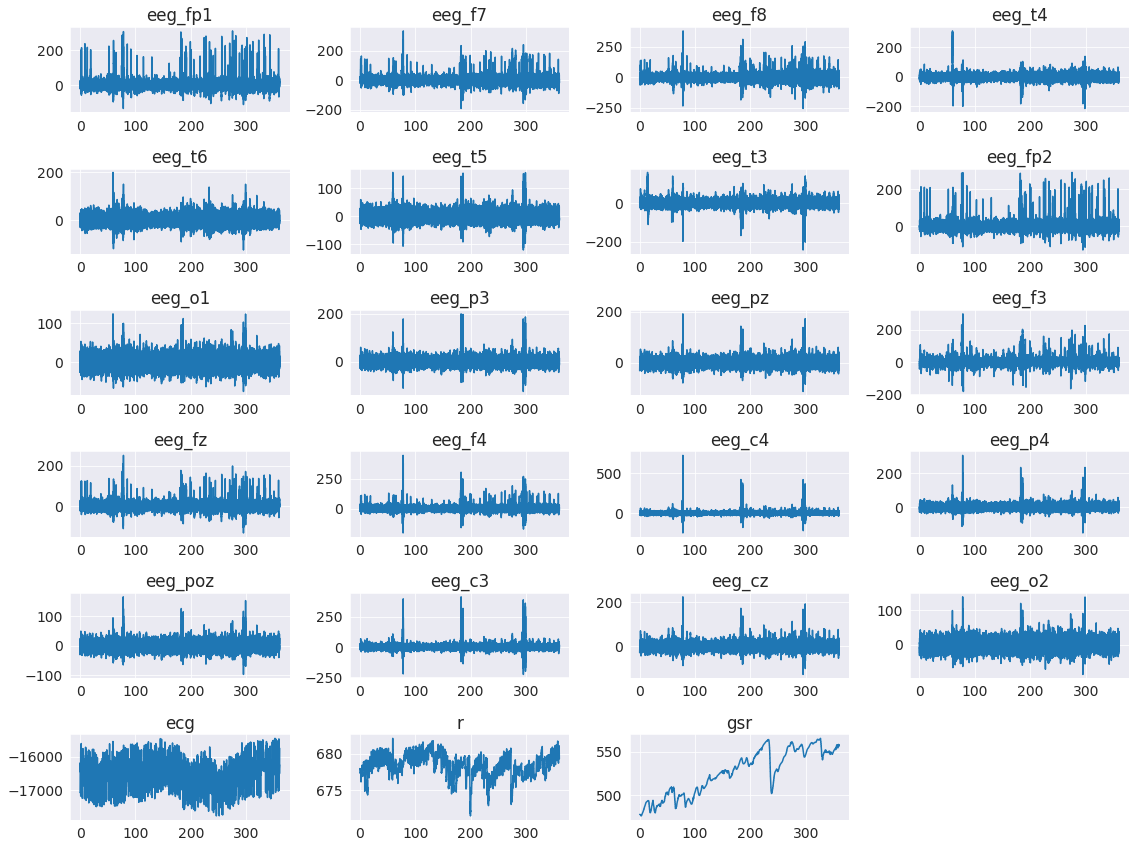

In [ ]:
plt.figure(figsize=[16,12])
for i in range(len(features)):
    plt.subplot(6,4,i+1)
    plt.plot(crew_13CA0.time,crew_13CA0[features[i]], zorder=1)
    plt.title(features[i])

plt.tight_layout()
plt.show()

#### Signal in first 10 seconds of experiment

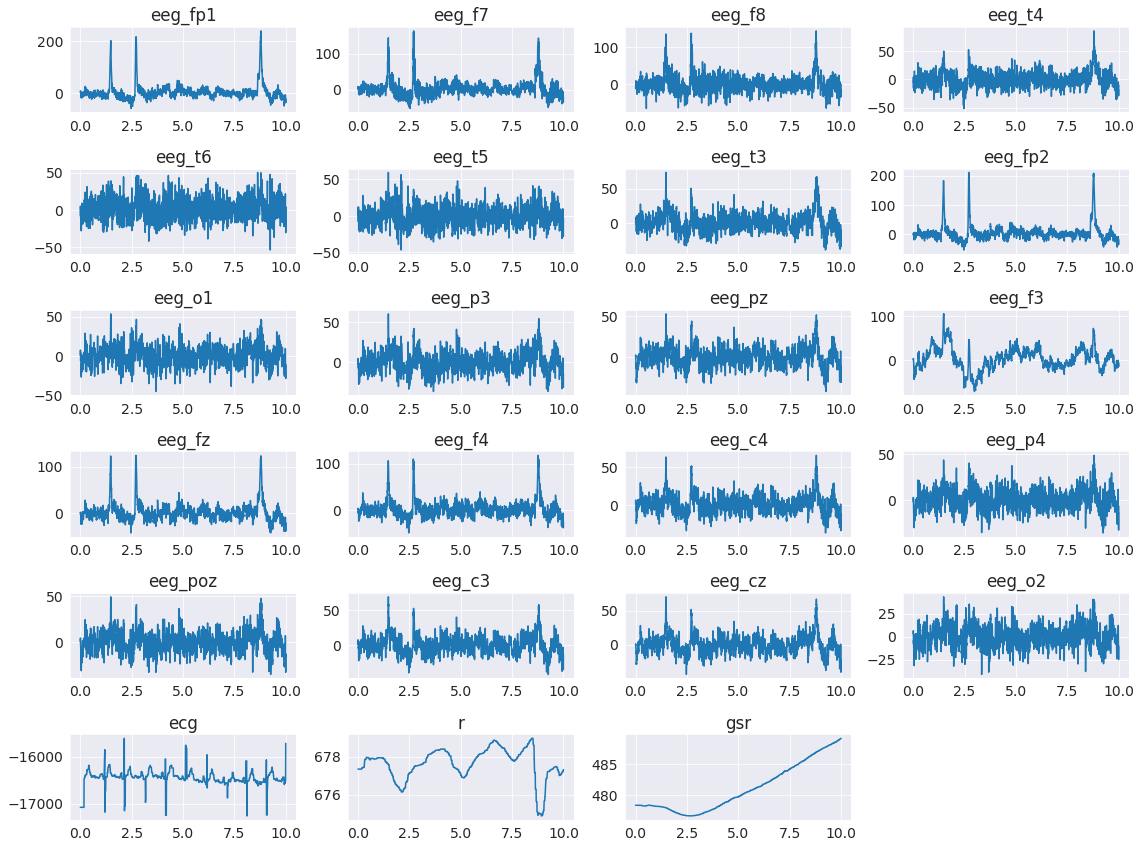

In [ ]:
plt.figure(figsize=[16,12])
for i in range(len(features)):
    plt.subplot(6,4,i+1)
    plt.plot(crew_13CA0_t.time,crew_13CA0_t[features[i]], zorder=1)
    plt.title(features[i])

plt.tight_layout()
plt.show()

In [ ]:
df=train_df.copy()
df_test=test_df.copy()

# **3. FEATURE ENGINEERING**



## a. Providing Separate Id to each Pilot
Giving a separate id to each member will help us in training our dataset based on each member , Because Human Activity data can vary from person to person. 

In [ ]:
df['member_id'] = 10*df['crew'] + df['seat']
df_test['member_id'] = 10*df_test['crew'] + df_test['seat']

## b. Formatting Target column
Formatting our target column to int type will avoid warnings and errors in some ensemble modelling which does not support categorical target column.

In [ ]:
dict_1 = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

df['event'] = df['event'].apply(lambda x: dict_1[x])

## c. Impute Missing Readings
Some pilots have missing data from sensors, which will read constant 0, we have to replace these 0's with the required values. Specially 'gsr' column have unexpectedly high 0's in training and testing dataset.


In [ ]:
for column_name in df_train.columns:
    column = df_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  crew  is :  0
Count of zeros in column  experiment  is :  0
Count of zeros in column  time  is :  0
Count of zeros in column  seat  is :  2433939
Count of zeros in column  eeg_fp1  is :  15845
Count of zeros in column  eeg_f7  is :  16329
Count of zeros in column  eeg_f8  is :  16360
Count of zeros in column  eeg_t4  is :  17022
Count of zeros in column  eeg_t6  is :  17284
Count of zeros in column  eeg_t5  is :  17331
Count of zeros in column  eeg_t3  is :  16687
Count of zeros in column  eeg_fp2  is :  15898
Count of zeros in column  eeg_o1  is :  16751
Count of zeros in column  eeg_p3  is :  17050
Count of zeros in column  eeg_pz  is :  16255
Count of zeros in column  eeg_f3  is :  16428
Count of zeros in column  eeg_fz  is :  17729
Count of zeros in column  eeg_f4  is :  17161
Count of zeros in column  eeg_c4  is :  16963
Count of zeros in column  eeg_p4  is :  16709
Count of zeros in column  eeg_poz  is :  17021
Count of zeros in column  eeg_c3  is :  167

In [ ]:
cols=list(df.columns)
numeric_cols=cols[4:27]
target_col=cols[27]
eeg_features=cols[4:24]

###  i) Remove 0's in gsr column separately 

Removing gsr column separately because they are unexpectedly in large numbers compared to other columns.  




In [ ]:
# Dectecting the member id's wchich are having 0's in there gsr column 

containsZero=[]
for pilot in tqdm(df.member_id.unique()):
    for exp in df[df.member_id==pilot].experiment.unique():
        chunk=df[(df.member_id==pilot) & (df.experiment==exp)]
        if (chunk.gsr==0).any():
            containsZero.append((pilot,exp))
list(map(lambda x:print('Detected zero gsr in Pilot No.{} Experiment:{}'.format(x[0],x[1])),containsZero));

# Replace 0's with nan's

df.loc[df.gsr==0,'gsr']=np.nan

# Making a pivot table to calculate mean gsr of individual pilots occuring with different events

gsr_reference=pd.pivot_table(df[['gsr','event','member_id']],index='member_id',columns=['event'],aggfunc=np.mean)
gsr_reference.head()

# Relace nan's with the the gsr column's mean of that indicidual member if we do not have all the 0's in that member_id
# Otherwise replace 0's with full gsr columns mean  

# Training set 
for i,(pilot,exp) in enumerate(containsZero):
    chunk=df[(df.member_id==pilot) & (df.experiment==exp)]
    if not np.isnan(chunk.gsr).all():
      df.loc[chunk[np.isnan(chunk.gsr)].index,'gsr']=chunk.gsr.mean()
    else:
      df.loc[chunk.index,'gsr']=gsr_reference.loc[pilot].mean()


# Testing Set
for pilot in tqdm(df_test.member_id.unique()):
    chunk=df_test[df_test.member_id==pilot]
    if (np.isnan(chunk.gsr)).any():
        df_test.loc[chunk[np.isnan(chunk.gsr)].index,'gsr']=gsr_reference.loc[pilot].mean()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/18 [00:00<?, ?it/s]

Detected zero gsr in Pilot No.21 Experiment:CA
Detected zero gsr in Pilot No.21 Experiment:DA
Detected zero gsr in Pilot No.21 Experiment:SS
Detected zero gsr in Pilot No.51 Experiment:DA
Detected zero gsr in Pilot No.70 Experiment:CA
Detected zero gsr in Pilot No.70 Experiment:DA


###  ii) Remove 0's in next higher ecg column separately 

Removing 0's from ecg column in the same way as gsr  

In [ ]:
# Detecting the columns which have 0's in ecg column

a=[]
for pilot in tqdm(df.member_id.unique()):
    for exp in df[df.member_id==pilot].experiment.unique():
        chunk=df[(df.member_id==pilot) & (df.experiment==exp)]
        if (chunk.ecg==0).any():
          a.append((pilot,exp))
list(map(lambda x:print('Detected zero ecg in Pilot No.{} Experiment:{}'.format(x[0],x[1])),a));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/18 [00:00<?, ?it/s]

Detected zero ecg in Pilot No.10 Experiment:DA


Now , To check wether this pilot does not have any ecg data at all? 

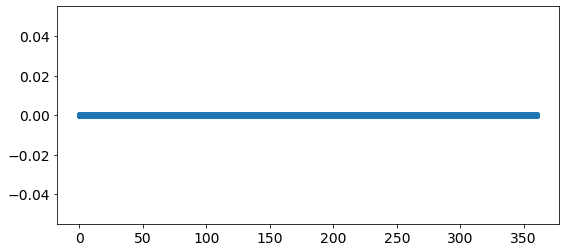

In [ ]:
plt.figure(figsize=(9,4))
for i,(pilot,exp) in enumerate(a):
    chunk=df[(df.member_id==pilot) & (df.experiment==exp)]
    plt.scatter(chunk.time,chunk.ecg)

Pilot no 10 does not have any ecg data and that is to be replaced by mean of the total ecg column 

In [ ]:
df.loc[df.ecg==0,'ecg']=np.nan

ecg_nan=df[(df.member_id==10) & (df.experiment=='DA')]

df.loc[ecg_nan[np.isnan(ecg_nan.ecg)].index,'ecg']=df[(df.member_id==10)].ecg.mean()

###  iii) Remove other remaining 0's with the columns mean 

Rest columns are having few 0's in all the pilot id's and that may be because of marging of error in sensor's readings , that is to be replaced by mean values 

In [ ]:
df[numeric_cols] = df[numeric_cols].replace(0, np.nan)
df_test[numeric_cols]=df_test[numeric_cols].replace(0,np.nan)

df=df.fillna(df.mean())
df_test=df_test.fillna(df_test.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## d. Filtering signals

To  filter our data and getting rates from raw signals we can use 
 [**Biosppy**](https://biosppy.readthedocs.io/en/stable/biosppy.signals.html#biosppy-signals-ecg) which is a toolbox for biosignal processing written in Python. The toolbox bundles together various signal processing and pattern recognition methods geared torwards the analysis of biosignals.

1. Extracts ecg rate from raw eeg signal
2. Extracts respiration rate from raw resp signal 
3. Extracts gsr amplitudes from raw gsr signal 
4. Extracts firing rate from raw eeg signal 
5. Filters the raw signal and gives you the filtered signal


**Visualizing Data using Biosppy Features**

In [ ]:
! pip install biosppy --quiet

from biosppy.signals import ecg, eeg, resp, eda

Text(0.5, 1.0, 'Heart rate(BPM) in first 10 seconds')

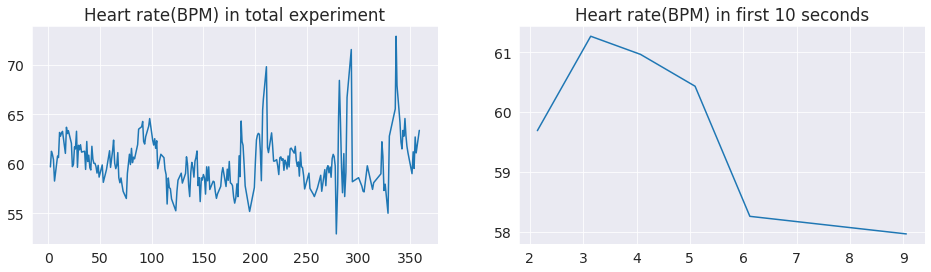

In [ ]:
fig = plt.figure(figsize=(16,4))

ecg_out = ecg.ecg(signal=crew_13CA0['ecg'].values, sampling_rate=256., show=False)
ax1 = plt.subplot2grid((1,2),(0,0))
plt.plot(ecg_out['heart_rate_ts'], ecg_out['heart_rate'])
plt.title('Heart rate(BPM) in total experiment')

ecg_out = ecg.ecg(signal=crew_13CA0_t['ecg'].values, sampling_rate=256., show=False)
ax2 = plt.subplot2grid((1,2),(0,1))
plt.plot(ecg_out['heart_rate_ts'], ecg_out['heart_rate'])
plt.title('Heart rate(BPM) in first 10 seconds')


Text(0.5, 1.0, 'Respiration rate(Hz) in first 10 seconds')

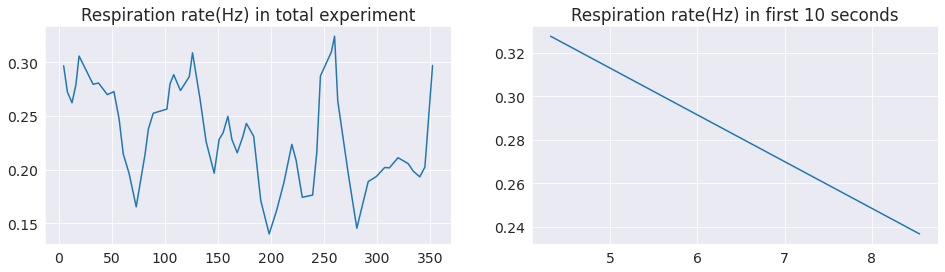

In [ ]:
fig = plt.figure(figsize=(16,4))

resp_out = resp.resp(signal=crew_13CA0['r'].values, sampling_rate=256., show=False)
ax1 = plt.subplot2grid((1,2),(0,0))
plt.plot(resp_out['resp_rate_ts'], resp_out['resp_rate'])
plt.title('Respiration rate(Hz) in total experiment')

resp_out = resp.resp(signal=crew_13CA0_t['r'].values, sampling_rate=256., show=False)
ax2 = plt.subplot2grid((1,2),(0,1))
plt.plot(resp_out['resp_rate_ts'], resp_out['resp_rate'])
plt.title('Respiration rate(Hz) in first 10 seconds')

Text(0.5, 1.0, 'gsr amplitudes')

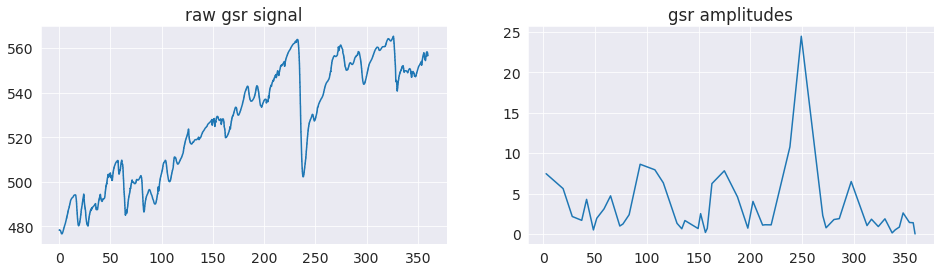

In [ ]:
fig = plt.figure(figsize=(16,4))


ax1 = plt.subplot2grid((1,2),(0,0))
plt.plot(crew_13CA0['time'], crew_13CA0['gsr'])
plt.title('raw gsr signal')

gsr_out = eda.eda(signal=crew_13CA0['gsr'].values, sampling_rate=256., show=False, min_amplitude=0)
ax2 = plt.subplot2grid((1,2),(0,1))
plt.plot(crew_13CA0['time'].values[gsr_out['onsets']], gsr_out['amplitudes'])
plt.title('gsr amplitudes')

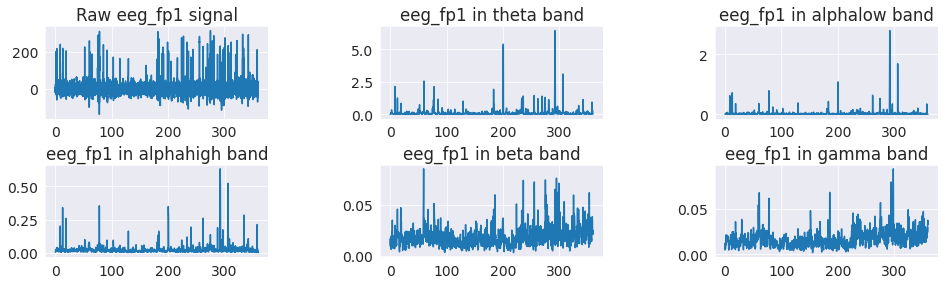

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot2grid((2,3),(0,0))
plt.plot(crew_13CA0['time'], crew_13CA0['eeg_fp1'])
plt.title('Raw eeg_fp1 signal')

eeg_out = eeg.get_power_features(signal=crew_13CA0[features[:20]].values, sampling_rate=256.)

ax2 = plt.subplot2grid((2,3),(0,1))
plt.plot(eeg_out['ts'], eeg_out['theta'][:,0])
plt.title('eeg_fp1 in theta band')

ax2 = plt.subplot2grid((2,3),(0,2))
plt.plot(eeg_out['ts'], eeg_out['alpha_low'][:,0])
plt.title('eeg_fp1 in alphalow band')

ax2 = plt.subplot2grid((2,3),(1,0))
plt.plot(eeg_out['ts'], eeg_out['alpha_high'][:,0])
plt.title('eeg_fp1 in alphahigh band')

ax2 = plt.subplot2grid((2,3),(1,1))
plt.plot(eeg_out['ts'], eeg_out['beta'][:,0])
plt.title('eeg_fp1 in beta band')

ax2 = plt.subplot2grid((2,3),(1,2))
plt.plot(eeg_out['ts'], eeg_out['gamma'][:,0])
plt.title('eeg_fp1 in gamma band')

plt.subplots_adjust(bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)


**Note--As Biosppy features creation are taking a lot of ram space and time, therefore i have limited my work without using it. Also i have tried working with some of the features from ecg, resp and gsr, but they are not much helpful in improving my final score. Therefor a little more research and High ram space is required to create features using this.** 

## e. EEG data feature addition.

This data is prepared in a fairly typical arrangement of 20 electrodes across the scalp. The letter in each lead signifies the part of the brain that that lead is nearest to (Temporal, Frontal, Parietal etc), with odd numbers on the left, evens on the right. Usually in the clinic, we don't look at the electrical potentials at each electrode, but at the potential difference between pairs of electrodes. This gives us an idea of the electrical field in the brain region between these two points as a way to infer what the brain is doing in that region. Clearly we have choosen one of the standard arrngement here which measures the potential differences of electrodes. But commonly there are other 10-20 system of arrangements for this.

For refference of this psychological data [click here](https://www.kaggle.com/stuartbman/introduction-to-physiological-data)

In [ ]:
# Training Set

df['fp1_f7'] = df['eeg_fp1'] - df['eeg_f7']
df['f7_t3'] = df['eeg_f7'] - df['eeg_t3']
df['t3_t5'] = df['eeg_t3'] - df['eeg_t5']
df['t5_o1'] = df['eeg_t5'] - df['eeg_o1']
df['fp1_f3'] = df['eeg_fp1'] - df['eeg_f7']
df['f3_c3'] = df['eeg_f3'] - df['eeg_c3']
df['c3_p3'] = df['eeg_c3'] - df['eeg_p3']
df['p3_o1'] = df['eeg_p3'] - df['eeg_o1']

df['fz_cz'] = df['eeg_fz'] - df['eeg_cz']
df['cz_pz'] = df['eeg_cz'] - df['eeg_pz']
df['pz_poz'] = df['eeg_pz'] - df['eeg_poz']

df['fp2_f8'] = df['eeg_fp2'] - df['eeg_f8']
df['f8_t4'] = df['eeg_f8'] - df['eeg_t4']
df['t4_t6'] = df['eeg_t4'] - df['eeg_t6']
df['t6_o2'] = df['eeg_t6'] - df['eeg_o2']
df['fp2_f4'] = df['eeg_fp2'] - df['eeg_f4']
df['f4_c4'] = df['eeg_f4'] - df['eeg_c4']
df['c4_p4'] = df['eeg_c4'] - df['eeg_p4']
df['p4_o2'] = df['eeg_p4'] - df['eeg_o2']

# Testing Set

df_test['fp1_f7'] = df_test['eeg_fp1'] - df_test['eeg_f7']
df_test['f7_t3'] = df_test['eeg_f7'] - df_test['eeg_t3']
df_test['t3_t5'] = df_test['eeg_t3'] - df_test['eeg_t5']
df_test['t5_o1'] = df_test['eeg_t5'] - df_test['eeg_o1']
df_test['fp1_f3'] = df_test['eeg_fp1'] - df_test['eeg_f7']
df_test['f3_c3'] = df_test['eeg_f3'] - df_test['eeg_c3']
df_test['c3_p3'] = df_test['eeg_c3'] - df_test['eeg_p3']
df_test['p3_o1'] = df_test['eeg_p3'] - df_test['eeg_o1']

df_test['fz_cz'] = df_test['eeg_fz'] - df_test['eeg_cz']
df_test['cz_pz'] = df_test['eeg_cz'] - df_test['eeg_pz']
df_test['pz_poz'] = df_test['eeg_pz'] - df_test['eeg_poz']

df_test['fp2_f8'] = df_test['eeg_fp2'] - df_test['eeg_f8']
df_test['f8_t4'] = df_test['eeg_f8'] - df_test['eeg_t4']
df_test['t4_t6'] = df_test['eeg_t4'] - df_test['eeg_t6']
df_test['t6_o2'] = df_test['eeg_t6'] - df_test['eeg_o2']
df_test['fp2_f4'] = df_test['eeg_fp2'] - df_test['eeg_f4']
df_test['f4_c4'] = df_test['eeg_f4'] - df_test['eeg_c4']
df_test['c4_p4'] = df_test['eeg_c4'] - df_test['eeg_p4']
df_test['p4_o2'] = df_test['eeg_p4'] - df_test['eeg_o2']



** Make sure that all the member ids created are going through all the target events**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


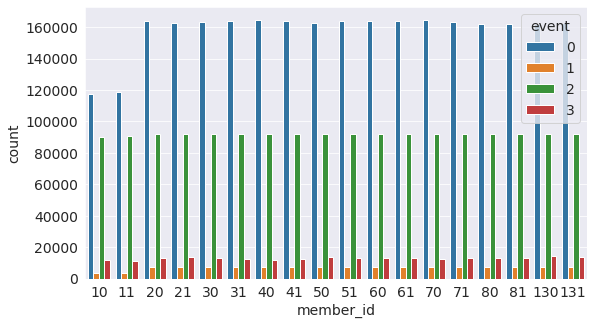

In [ ]:
sns.countplot('member_id',hue='event',data=df3)

## f. Scaling of features
After trying MinMax Scaler, Standardized Scaler and Robust Scaler, It seems that Robust Scaler is performing good because it's somewhat nullifying the effect of Outliers which are present in our data. This scales our data based on Q1(25%) and Q3(75%) percentile as its maximum and minimum values. 
Scaler is applied to each member Individually to avoid intermixing of pilot's data.   


In [ ]:
all_features = numeric_cols
from sklearn.preprocessing import RobustScaler

for pilot in tqdm(df.member_id.unique()):
    scaler=RobustScaler()
    chunk=df.loc[df.member_id==pilot,all_features]
    df.loc[chunk.index,all_features]=scaler.fit_transform(chunk).astype('float32')
    
    test_chunk=df_test.loc[df_test.member_id==pilot,all_features]
    df_test.loc[test_chunk.index,all_features]=scaler.transform(test_chunk).astype('float32')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/18 [00:00<?, ?it/s]

## g. Drop the columns which are not required and sort data 

In [ ]:
df1=df.drop(eeg_features, axis = 1)
df2=df_test.drop(eeg_features, axis = 1)

df1=df1.sort_values(by=['member_id','experiment','time'])
df2=df2.sort_values(by=['member_id','experiment','time'])

# **4. Save the Featured Data**

Save the new **featured training and test dataset** in your **google drive** with **parquet format**(reduction in memory with fast processing)  for further use in building up of different models 

In [ ]:
!pip install pyarrow --quiet

In [ ]:
df1.to_parquet('train.parquet')

df2.to_parquet('test.parquet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Uncomment below given code and copy path of your google drive folder '---'

In [ ]:
# !cp -av '/content/sample_data/ML' '/content/drive/MyDrive/Jovian/ML project'

'/content/sample_data/ML' -> '/content/drive/MyDrive/Jovian/ML project/ML'
'/content/sample_data/ML/new_featured_dataframe.parquet' -> '/content/drive/MyDrive/Jovian/ML project/ML/new_featured_dataframe.parquet'


# **5. Modelling**

<img src='https://drive.google.com/uc?id=1-qPsEyCmMDdcsd1XdLzGiMMYJ2BOmZ4a'>

## a. Import and process the data

In [ ]:
train_df = pd.read_parquet('/content/drive/MyDrive/Jovian/ML project/ML/train.parquet')
test_df = pd.read_parquet('/content/test-dataset/test.parquet')

## b. Splitting the training data in to train and validation

In [ ]:
train_inputs = train_df[numeric_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs=test_df[numeric_cols].copy()

from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(train_inputs, train_targets,
                                     test_size=0.80, stratify= train_targets, random_state=42)


Make sure that each member have sufficent data in Training,Validation and Test set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


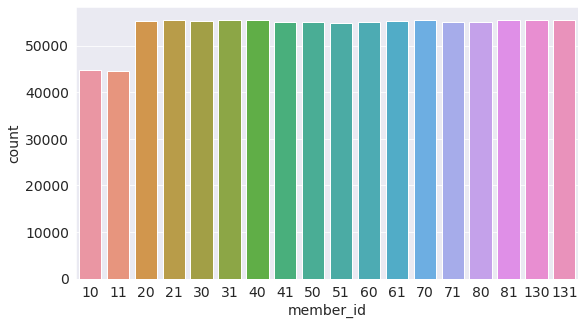

In [ ]:
#Training

sns.countplot('member_id',data=X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


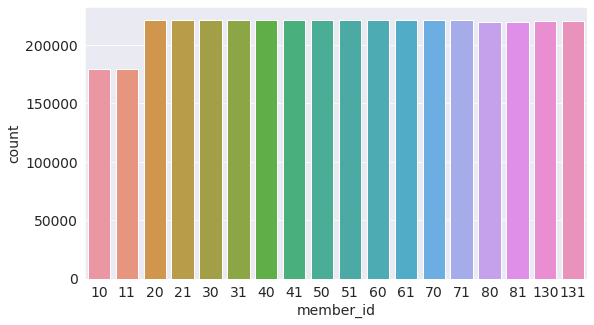

In [ ]:
# Validation

sns.countplot('member_id',data=X_valid)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


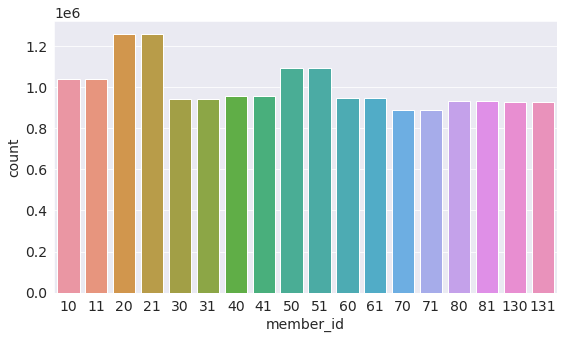

In [ ]:
# Test

sns.countplot('member_id',data=test_inputs)

## c. Training and Evaluation of our data 

Training of data throgh different Ensemble Modellings such as **Random Forest, LightGbm & Xgboost are done in my different notebooks**--- F**rom which we concludes that Xgboost with the given set of parameters comes out to be good** for predicting this data on each crew member separately. 

In [ ]:
member_list = sorted(X_train['member_id'].unique())
print(member_list)

[10, 11, 20, 21, 30, 31, 40, 41, 50, 51, 60, 61, 70, 71, 80, 81, 130, 131]


In [ ]:
def train_and_evaluate(ModelClass,train,targets,val, val_targets, **params):
    model = ModelClass(**params)
    model.fit(train,targets.values.ravel())
    train_log_loss=log_loss(targets, model.predict_proba(train))
    val_log_loss= log_loss(val_targets, model.predict_proba(val))
    return model,train_log_loss,val_log_loss


## d. Hyperparameter Tuning based on Training and Validation Score
logloss is used to compare our models as suggested by the evaluation criteria of this competition on Kaggle

In [ ]:
def check_params(ModelClass,param_name, param_values, **other_params):
  
  models,train_log_losses,val_log_losses = [], [] ,[]

  for value in param_values:
    params = dict(other_params)
    params[param_name] = value
    
    for i, pilot in enumerate (member_list):
      X_tr = X_train[X_train['member_id']== pilot].drop('member_id', axis = 1)
      Y_tr = Y_train[X_train['member_id'] == pilot]
      X_val = X_valid[X_valid['member_id'] == pilot].drop('member_id', axis = 1)
      Y_val = Y_valid[X_valid['member_id'] == pilot]
    
 
      model,train_log_loss,val_log_loss= train_and_evaluate(ModelClass,X_tr,Y_tr, X_val,Y_val, **params)
      models.append(model)
      train_log_losses.append(train_log_loss)
      val_log_losses.append(val_log_loss)
    print('train_log_loss: {}'.format(np.mean(train_log_losses)))
    print('val_log_loss: {}'.format(np.mean(val_log_losses)))


## e. Applying Models for each member in Test Dataset

Single prepared Model is applied separately to each and individual pilot in training data and the same model is used for predictions on each pilot separately in test data 

In [ ]:
all_results = np.zeros((test_inputs.shape[0], 5))
all_results[:, 0] =test_df['id']

def test_submissions(inputs,final_model):

  
  for i, pilot in enumerate (member_list):
    X_tr = X_train[X_train['member_id']== pilot].drop('member_id', axis = 1)
    Y_tr = Y_train[X_train['member_id'] == pilot]
    X_val = X_valid[X_valid['member_id'] == pilot].drop('member_id', axis = 1)
    Y_val = Y_valid[X_valid['member_id'] == pilot]

    pilot_model = final_model

    pilot_model.fit(X_tr,Y_tr.values.ravel())


    
    X_test =inputs[inputs['member_id']== pilot].drop(['member_id'], axis =1)
    pilot_results = pilot_model.predict_proba(X_test)
    
    all_results[inputs['member_id']== pilot, 1:5] = pilot_results
    return all_results

## f. Generate Submissions in given format
The predicted probabilities of each event for every row is required to be submitted in csv format, then kaggle will score us based on log_loss calculated from this csv.

In [ ]:
def generate_submission(results):
  
  submission = pd.DataFrame(results, columns=['id', 'A', 'B', 'C', 'D'])
  submission['id'] = submission['id'].astype(int)
  submission=submission.sort_values(by='id')
  submission.to_csv("submission.csv", index=False)

## f. Models----

### i) **XgBoost**

In [ ]:
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import log_loss

In [ ]:
best_params = {'random_state': 42,'n_jobs': -1,'n_estimators':50,'max_depth':4}

In [ ]:
check_params(XGBClassifier, 'learning_rate', [0.1,0.3, 0.6], **best_params)

train_log_loss: 0.16233847151728947
val_log_loss: 0.16565873630295846
train_log_loss: 0.12573530896597956
val_log_loss: 0.13254582696835338
train_log_loss: 0.10094018024818813
val_log_loss: 0.11183503610151349


In [ ]:
check_params(XGBClassifier, 'learning_rate', [0.1,0.3, 0.6], **best_params)

train_log_loss: 0.16233847151728947
val_log_loss: 0.16565873630295846
train_log_loss: 0.12573530896597956
val_log_loss: 0.13254582696835338
train_log_loss: 0.10094018024818813
val_log_loss: 0.11183503610151349


In [ ]:
best_params = {'random_state': 42,'n_jobs': -1,'n_estimators':100,'max_depth':7,'tree_method':'hist','max_delta_step':2,'early_stopping_rounds':10}

In [ ]:
check_params(XGBClassifier, 'learning_rate', [0.6], **best_params)

train_log_loss: 0.0016464584248206651
val_log_loss: 0.042550749319662164


In [ ]:
check_params(XGBClassifier, 'learning_rate', [0.1,0.3, 0.6], **best_params)

train_log_loss: 0.16233847151728947
val_log_loss: 0.16565873630295846
train_log_loss: 0.12573530896597956
val_log_loss: 0.13254582696835338
train_log_loss: 0.10094018024818813
val_log_loss: 0.11183503610151349


In [ ]:
best_params = {'random_state': 42,'n_jobs': -1,'n_estimators':100,'max_depth':7,'tree_method':'hist','max_delta_step':2,'early_stopping_rounds':10}

In [ ]:
check_params(XGBClassifier, 'learning_rate', [0.6], **best_params)

train_log_loss: 0.0016464584248206651
val_log_loss: 0.042550749319662164


In [ ]:
best_params = {'random_state': 42,'n_jobs': -1,'n_estimators':60,'tree_method':'hist','early_stopping_round':10,'learning_rate':0.5}

In [ ]:
check_params(XGBClassifier, 'max_depth',[5], **best_params)

train_log_loss: 0.03416763799968866
val_log_loss: 0.0601038136936216


**Note--Data is easily overfitting in Xgboost as we change the Hyperparameters, They are making the predictions more conservative, which is not good**



In [ ]:
final_model=XGBClassifier(learning_rate=0.3, max_depth=6, alpha=1, n_estimators=50, subsample=0.5)

test_submissions(test_inputs,final_model)

generate_submission(all_results)

!cp -av '/content/submission.csv' '/content/drive/MyDrive/Jovian/ML project'


**Score**

<img src='https://drive.google.com/uc?id=1ExqkOqeusoQ7wS5jUzLz4rprlUPR4lnn'>



In [ ]:
final_model=XGBClassifier(lweight=[0.42,9.30,0.74,5.20],random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

test_submissions(test_inputs,final_model)

generate_submission(all_results)

!cp -av '/content/submission.csv' '/content/drive/MyDrive/Jovian/ML project'

**Score**

<img src='https://drive.google.com/uc?id=1P16PUwZI7d34WdR8ZbzqSSr_7HN4LiN5'>


### ii) **LightGBM**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import log_loss

In [ ]:
final_model= lgb.LGBMClassifier(objective='multiclass', class_weight ='balanced')

test_submissions(test_inputs,final_model)

generate_submission(all_results)

!cp -av '/content/submission.csv' '/content/drive/MyDrive/Jovian/ML project'class


**Score**

<img src='https://drive.google.com/uc?id=1EEexSimFEnAgveuQu_SXSXQ1FO-t6Tv6'>


### iii) **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'n_estimators':20,
    'max_leaf_nodes':2**7}


In [ ]:
check_params(RandomForestClassifier,'min_samples_split', [30, 60, 100], **best_params)

train_log_loss: 0.18923494976200003
val_log_loss: 0.19901965617349038
train_log_loss: 0.18923494976200003
val_log_loss: 0.19901965617349035
train_log_loss: 0.18891332943400874
val_log_loss: 0.19867449155625713


In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'max_leaf_nodes':2**7,
    'min_samples_split':60
    }


In [ ]:
check_params(RandomForestClassifier,'n_estimators', [60, 70, 80], **best_params)

train_log_loss: 0.18973469765746437
val_log_loss: 0.19938812358501068
train_log_loss: 0.18985883286015914
val_log_loss: 0.19949932730564515
train_log_loss: 0.19009629723829577
val_log_loss: 0.199735349014723


In [ ]:
final_model = RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=30,
                                     max_depth=4,max_leaf_nodes=2**4,
                                     min_samples_split=60, min_samples_leaf=30)


In [ ]:
test_submissions(test_inputs,final_model)

generate_submission(all_results)

!cp -av '/content/submission.csv' '/content/drive/MyDrive/Jovian/ML project'class

**Score**

<img src='https://drive.google.com/uc?id=1QzTDPXqlTHPr3Aq5p4GQhtE5fGT_RiCp'>


# **6. Summary**


*   RandomForest Classifier with tuned parameters land us on **Top 26% of Kaggle competition leaderboard** with the score of 0.71248 .

*   Data may vary from person to person therefore we are training and testing the data for each member separately.
   
*   **Randomforest** works well compared to other Ensemble models, Xgboost with little more check on parameters may get equally well, therefore more parameter tuning needs to be done , to decrease our log_loss score         

*   **Handling large data** at once can be cumbersome that is also one of the reasons to create member_ids are created to visualize and process the data.






# **7. Future Work**

*  **More Research on Feature Engineering** is required to beat the top score, Specially the feature of filtered signal is a tricky task because when we filter the signal sometimes it ends up with loss of useful information which is not suitable for modelling. 

*   **Large Ram space needed** to tackcle 6Gb of data and to do feature engineering (Google Collab Pro+ subscription can make this task easier) 

*   Human Activity Recognition Techniques can be studied in detail to get more deepful insights from the data.

*  **More Hyperparameter Tuning** in deeper levels can be implemented to all ensemble models. (**Gridsearch CV** can be used to tune more than parameters at Once ) 

*  Other GBM's such as **Catboost,Adaboost etc.** can also be tried for more accuracy. 

*  **Biosppy** library can be used to extract filtered signal from the raw data & other useful information such as Heart rate, Respiration rate, Gsr Amplitude, firing rate etc.  




# **8. References**

How to work on ML project-- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/workshop-machine-learning-project-from-scratch

Physiological data-- https://www.kaggle.com/stuartbman/introduction-to-physiological-data

RandomForest-- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests

XgBoost-- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost

Aviation Fatalities Data Insight-- https://www.kaggle.com/mrbruce/aviation-fatalities-data-insight

Blogpost--  https://medium.com/swlh/wait-ever-examined-your-pilot-before-boarding-21e6a8445a9a

Biosspy usage ---- https://www.kaggle.com/shahaffind/reducing-commercial-aviation-fatalities-11th

Feature engineering on time series data— https://towardsdatascience.com/feature-engineering-on-time-series-data-transforming-signal-data-of-a-smartphone-accelerometer-for-72cbe34b8a60

To handle imbalance-- https://towardsdatascience.com/how-to-handle-multiclass-imbalanced-data-say-no-to-smote-e9a7f393c310



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dwivedi-rishabh95/use-of-ensemble-modelling-to-reduce-fatalities-in-aviation-industry-by-xgboost


'https://jovian.ai/dwivedi-rishabh95/use-of-ensemble-modelling-to-reduce-fatalities-in-aviation-industry-by-xgboost'